# AI Final Project - Precipitation Prediction
### Google DSC BINUS Kemanggisan
Name: Daniel Yohanes<br/>
NIM: 2501975261

### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
weather_history = pd.read_csv("weatherHistory.csv")
weather_history.head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


#### Instead of working with complete timestamps, months from each column values will be used instead. By working with months, we can see which months each precipitation occurs the most at. 

#### Note: The function below will iterate over the "Formatted Date" column to replace each values, so a bit of time will be taken in this process. Atleast 3 minutes

In [3]:
for index, date in weather_history["Formatted Date"].iteritems():
    weather_history.loc[index, "Formatted Date"] = int(weather_history.loc[index, "Formatted Date"][5:7])

In [69]:
weather_history.tail(5)

,Month,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
96448,9,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,9,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,9,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,9,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.
96452,9,Partly Cloudy,rain,20.438889,20.438889,0.61,5.8765,39.0,15.5204,0.0,1016.16,Partly cloudy starting in the morning.


In [70]:
weather_history.rename(columns={"Formatted Date": "Month"}, inplace = True)

### Finding and removing missing data

In [71]:
weather_history.isnull().sum()

Month                       0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [72]:
weather_history.dropna(inplace = True)

#### Separate dataframes made for data visualization (rain vs snow)

In [73]:
rain_dataframe = weather_history[weather_history["Precip Type"] == "rain"]
snow_dataframe = weather_history[weather_history["Precip Type"] == "snow"]

In [74]:
rain_dataframe.head(5)

,Month,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,4,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,4,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,4,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,4,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [75]:
snow_dataframe.head(5)

,Month,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
1562,12,Foggy,snow,-0.483333,-4.150000,1.00,11.0929,219.0,0.483,0.0,1031.56,Foggy throughout the day.
1563,12,Foggy,snow,-0.483333,-4.061111,0.96,10.7387,200.0,0.322,0.0,1031.47,Foggy throughout the day.
1564,12,Foggy,snow,-0.922222,-3.477778,1.00,7.0679,206.0,0.161,0.0,1031.23,Foggy throughout the day.
1565,12,Foggy,snow,-1.038889,-4.400000,1.00,9.4990,199.0,0.161,0.0,1031.41,Foggy throughout the day.
1566,12,Foggy,snow,-1.088889,-4.438889,1.00,9.4346,219.0,0.322,0.0,1031.98,Foggy throughout the day.


In [76]:
print("Number of rain dataframe data: " + str(len(rain_dataframe.index)))
print("Number of snow dataframe data: " + str(len(snow_dataframe.index)))

Number of rain dataframe data: 85224
Number of snow dataframe data: 10712


### Data Visualization

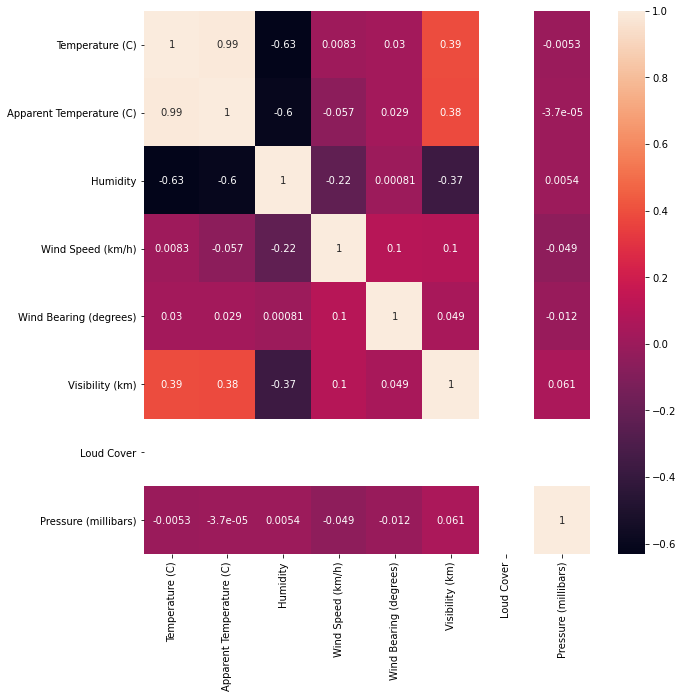

In [77]:
plt.figure(figsize=(10, 10))
sns.heatmap(weather_history.corr(), annot = True);

#### 1000 sample data from both dataframes had been selected for data visualization & analysis

In [78]:
rain_data_sample = rain_dataframe.sample(1000, random_state = 0)
snow_data_sample = snow_dataframe.sample(1000, random_state = 0)
rain_data_sample.reset_index(inplace = True)
snow_data_sample.reset_index(inplace = True)

In [79]:
label_list = []
rain_mean_list = []
snow_mean_list = []

for i in list(snow_dataframe):
    if np.dtype(weather_history[i]) != object and i != "Loud Cover":
        label_list.append(i)
        rain_mean_list.append(rain_dataframe[i].mean())
        snow_mean_list.append(snow_dataframe[i].mean())

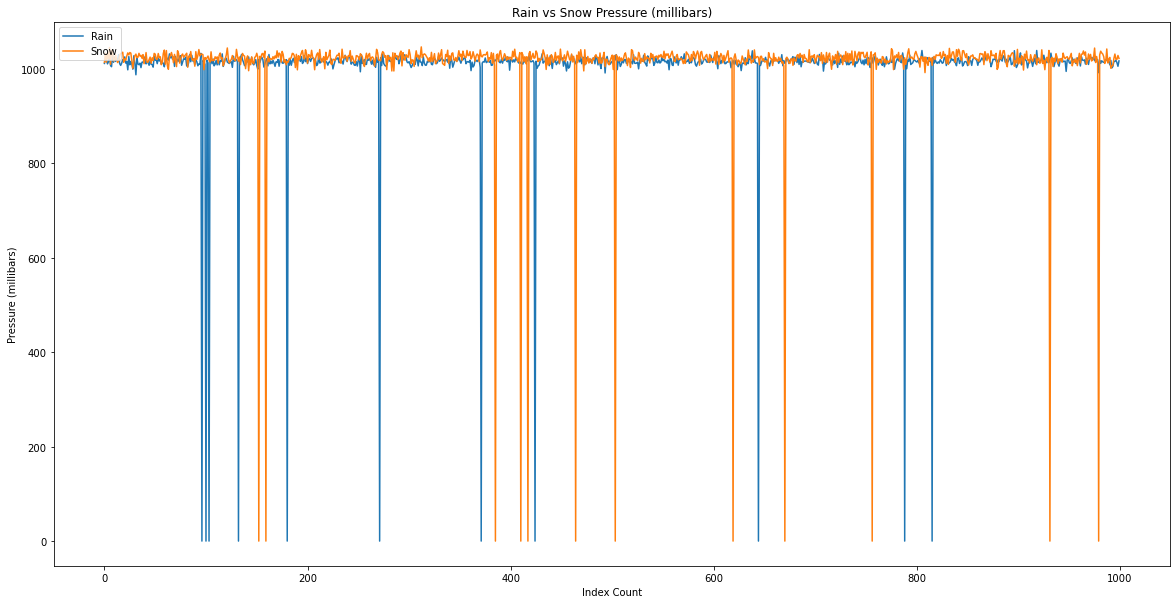

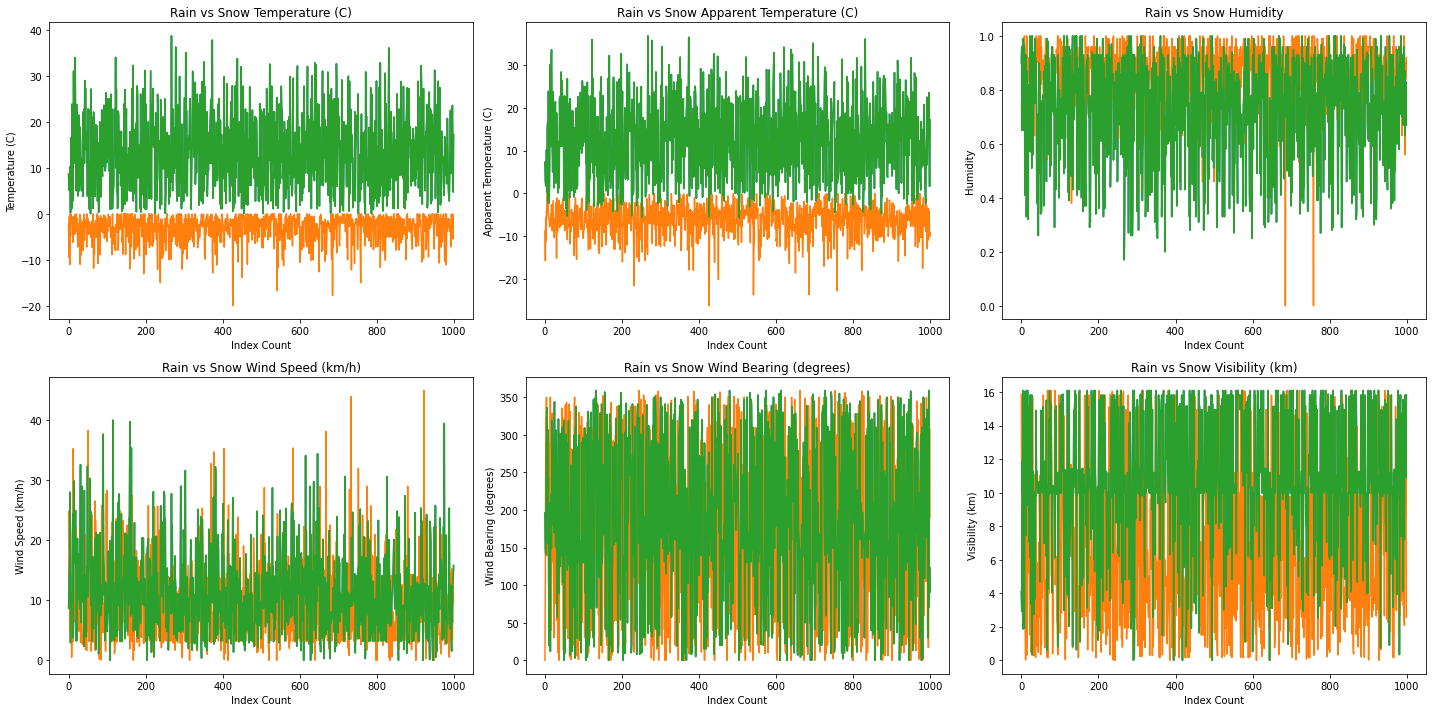

In [81]:
plt.figure(figsize=(20, 10))
plt.plot(rain_data_sample[label_list[len(label_list) - 1]]);
plt.plot(snow_data_sample[label_list[len(label_list) - 1]]);
plt.title("Rain vs Snow " + str(label_list[len(label_list) - 1]));
plt.xlabel("Index Count");
plt.ylabel(str(label_list[len(label_list) - 1]));
plt.legend(["Rain", "Snow"], loc = 2);

index = 0

fig, axes = plt.subplots(2, 3, figsize = (20, 10))

for i in range (0, 2):
    for j in range (0, 3):
        axes[i, j].plot(rain_data_sample[label_list[index]]);
        axes[i, j].plot(snow_data_sample[label_list[index]]);
        axes[i, j].plot(rain_data_sample[label_list[index]]);
        axes[i, j].set_title("Rain vs Snow " + str(label_list[index]));
        axes[i, j].set_xlabel("Index Count");
        axes[i, j].set_ylabel(str(label_list[index]));
        index += 1

fig.tight_layout()

### Visualize Means

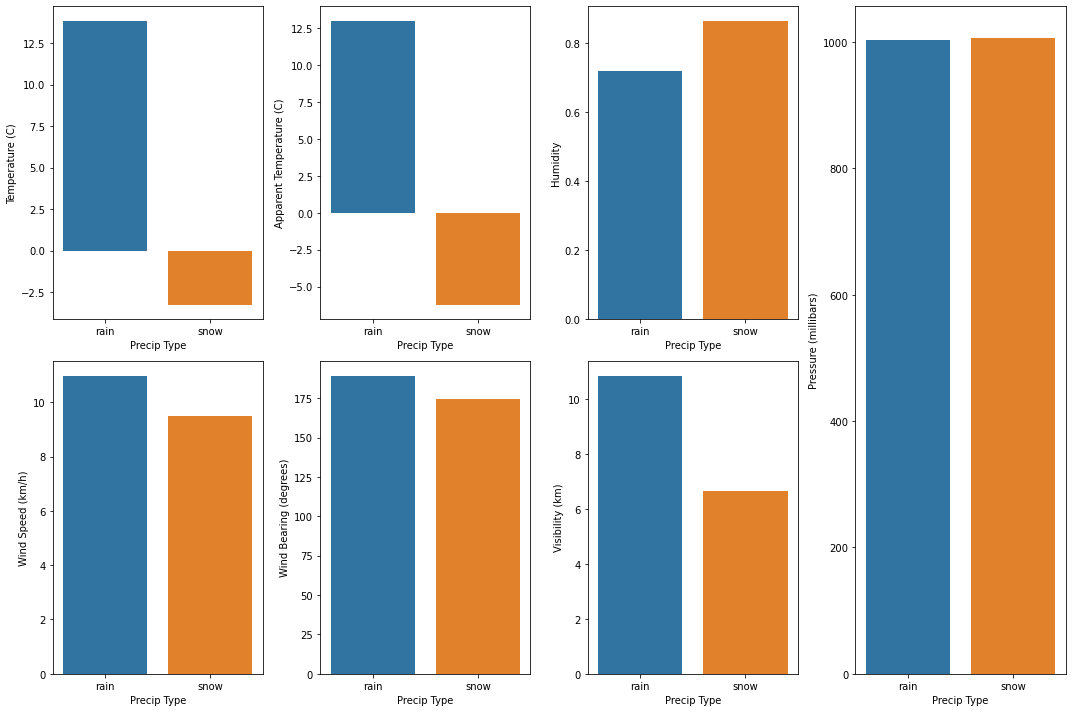

In [82]:
fig, axes = plt.subplots(2, 4, figsize = (15, 10))
index = 0

for i in range (0, 2):
    for j in range (0, 3):
        sns.barplot(ax = axes[i, j], x="Precip Type", y = label_list[index], data = weather_history, ci = None)
        index += 1
        
for ax in axes[0:, -1]:
    ax.remove()
    
gs = axes[1, 2].get_gridspec()
newAx = fig.add_subplot(gs[0:, -1])

sns.barplot(ax = newAx, x="Precip Type", y = label_list[len(label_list) - 1], data = weather_history, ci = None);

fig.tight_layout()

### Spotting Outliers

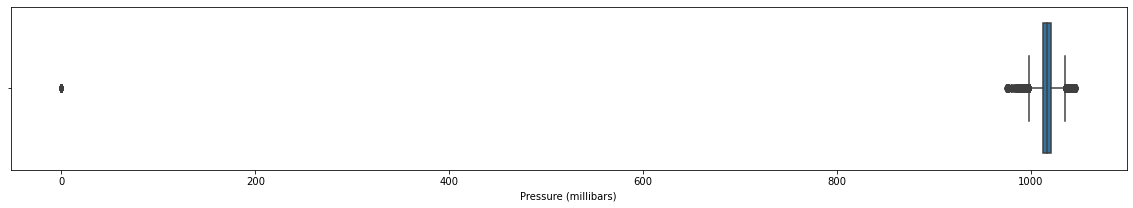

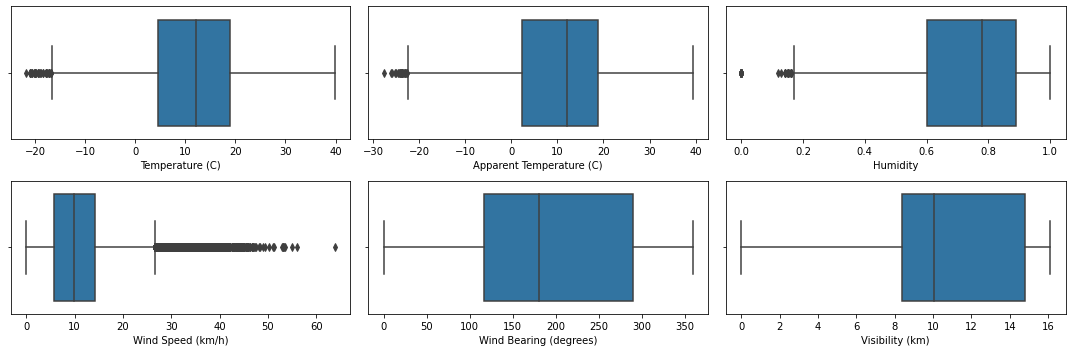

In [83]:
plt.figure(figsize = (20, 3))
sns.boxplot(x=weather_history[label_list[len(label_list) - 1]])

fig, axes = plt.subplots(2, 3, figsize = (15, 5))
index = 0

for i in range (0, 2):
    for j in range (0, 3):
        sns.boxplot(ax = axes[i, j], x=weather_history[label_list[index]])
        index += 1
        
fig.tight_layout()

In [84]:
weather_history.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.0,95936.000000
mean,11.940976,10.862531,0.734841,10.804936,187.518773,10.362402,0.0,1003.150038
std,9.570671,10.717812,0.195724,6.920727,107.385351,4.173780,0.0,117.276976
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.604167,2.276389,0.600000,5.796000,116.000000,8.372000,0.0,1011.890000
50%,12.033333,12.033333,0.780000,9.933700,180.000000,10.046400,0.0,1016.420000
75%,18.844444,18.844444,0.890000,14.135800,290.000000,14.812000,0.0,1021.050000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


Outliers found after visualizing data from the graphs above along with the describe method(). Multiple values of 0 had been found in columns of humidity and pressure. Other values of 0 from other columns are more likely to be possible (Visibility, Windspeed, etc), but just not these two.

### Replace the outliers with the mean of its respective column value

In [85]:
rain_dataframe["Pressure (millibars)"].replace(0, rain_dataframe["Pressure (millibars)"].mean(), inplace = True)
snow_dataframe["Pressure (millibars)"].replace(0, snow_dataframe["Pressure (millibars)"].mean(), inplace = True)

rain_dataframe["Humidity"].replace(0, rain_dataframe["Humidity"].mean(), inplace = True)
snow_dataframe["Humidity"].replace(0, snow_dataframe["Humidity"].mean(), inplace = True)

C:\Users\Daniel\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


Create a new dataframe by merging both dataframes

In [86]:
new_weather_dataframe = pd.concat([rain_dataframe, snow_dataframe], axis = 0)

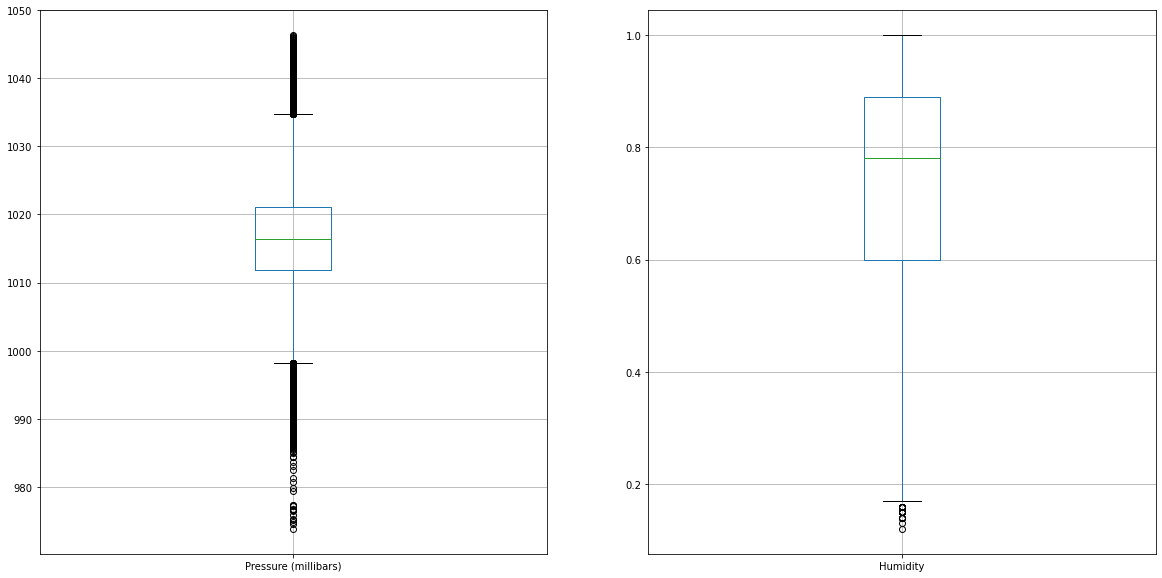

In [87]:
plt.subplot(1, 2, 1)
new_weather_dataframe.boxplot("Pressure (millibars)")

plt.subplot(1, 2, 2)
new_weather_dataframe.boxplot("Humidity")
plt.show();

In [88]:
rain_data_sample = rain_dataframe.sample(1000, random_state = 0)
snow_data_sample = snow_dataframe.sample(1000, random_state = 0)
rain_data_sample.reset_index(inplace = True)
snow_data_sample.reset_index(inplace = True)

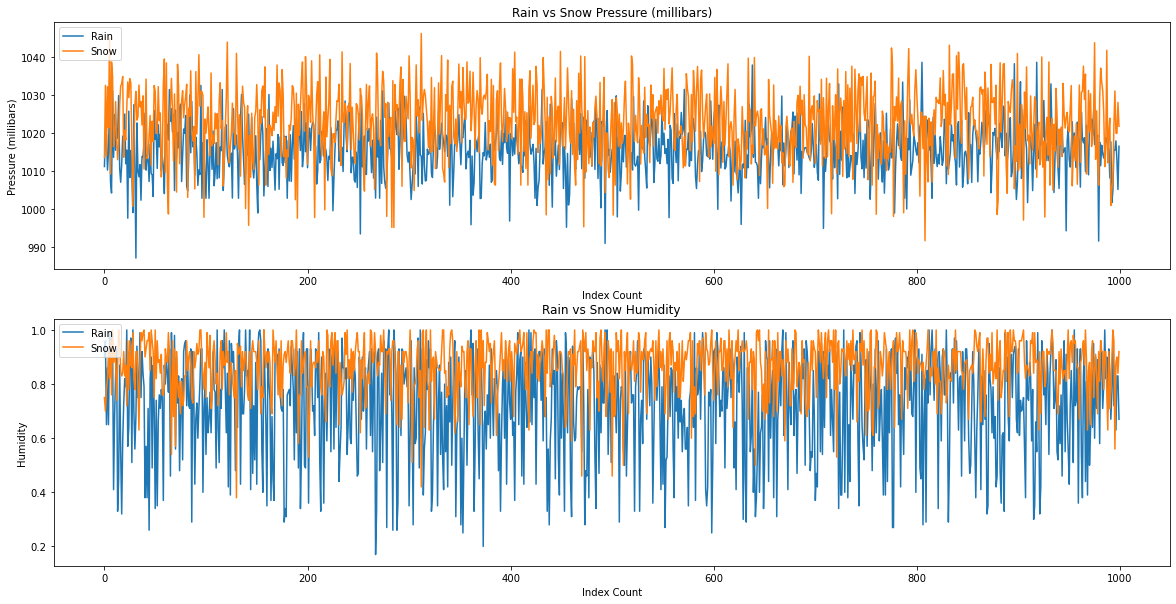

In [89]:
index = 1

for label in ["Pressure (millibars)", "Humidity"]:
    plt.subplot(2, 1, index)
    plt.plot(rain_data_sample[label]);
    plt.plot(snow_data_sample[label]);
    plt.title("Rain vs Snow " + label);
    plt.xlabel("Index Count");
    plt.ylabel(label);
    plt.legend(["Rain", "Snow"], loc = 2);
    index += 1

Data visualization after handling outliers

In [90]:
new_weather_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95936 entries, 0 to 93506
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     95936 non-null  object 
 1   Summary                   95936 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           95936 non-null  float64
 4   Apparent Temperature (C)  95936 non-null  float64
 5   Humidity                  95936 non-null  float64
 6   Wind Speed (km/h)         95936 non-null  float64
 7   Wind Bearing (degrees)    95936 non-null  float64
 8   Visibility (km)           95936 non-null  float64
 9   Loud Cover                95936 non-null  float64
 10  Pressure (millibars)      95936 non-null  float64
 11  Daily Summary             95936 non-null  object 
dtypes: float64(8), object(4)
memory usage: 9.5+ MB


In [91]:
print(len(new_weather_dataframe["Summary"].unique()))
print(len(new_weather_dataframe["Month"].unique()))
print(len(new_weather_dataframe["Daily Summary"].unique()))

27
12
214


#### This graph corresponds to the frequency of each precipitation type in each month

We can observe that rain occurs every month. Snow however is seasonal, and will only occur in specific months. For example, it is shown that snow occurs during the winter season, mostly in December and January.

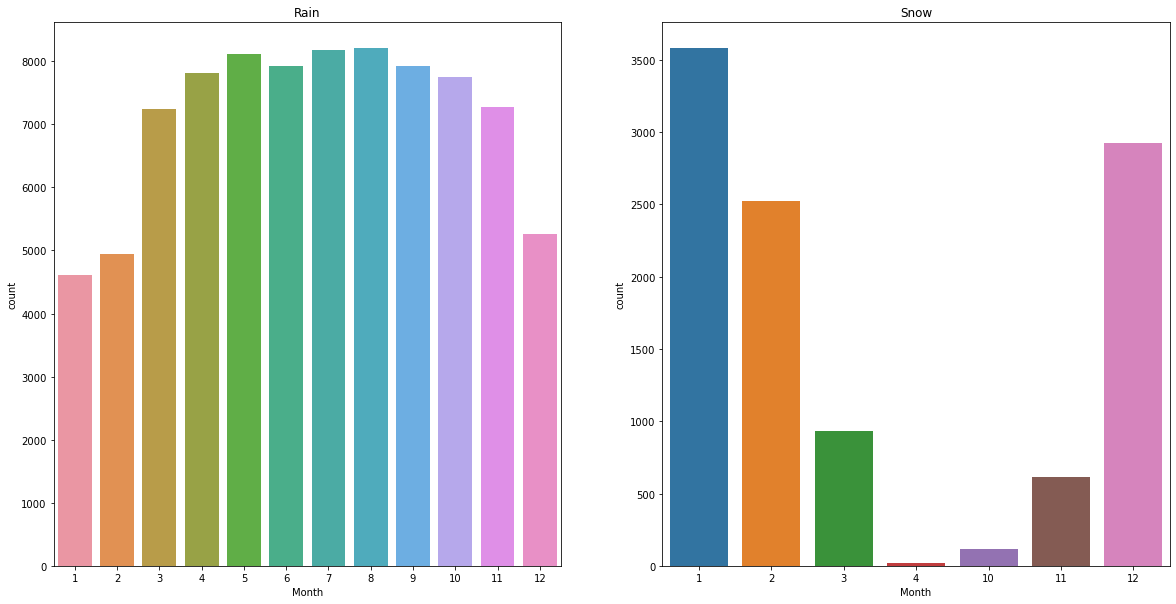

In [92]:
plt.subplot(1, 2, 1)
sns.countplot(x ="Month", data = new_weather_dataframe[new_weather_dataframe["Precip Type"] == "rain"])
plt.title("Rain")
plt.subplot(1, 2, 2)
sns.countplot(x ="Month", data = new_weather_dataframe[new_weather_dataframe["Precip Type"] == "snow"])
plt.title("Snow")
fig.tight_layout()

We will convert it into 0s and 1s indicating true of false for the occurance of rain/snow in that specific month

In [93]:
month_frame = pd.get_dummies(new_weather_dataframe["Month"])

In [94]:
month_frame.head(5)

,1,2,3,4,5,6,7,8,9,10,11,12
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0


We will only keep months that had the occurance of snow to make it more specific and compact

In [95]:
month_frame.drop([5, 6, 7, 8, 9], axis = 1, inplace = True)
month_frame.rename(columns={1: "January", 2: "February", 3: "March", 4: "April", 10: "October", 11: "November", 12: "December"}, inplace = True)

In [96]:
month_frame.head(5)

,January,February,March,April,October,November,December
0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0


### Remove Unnecessary Data

Loud Cover deleted because has a constant value of 0.<br/>

Daily Summary deleted due to its high number of unique data. When working with this data, we will need to convert it from categorical to numerical (0s and 1s). This column however contains 214 unique values, which means 214 new columns will be made. It is unnecessary to add 214 more columns into the data.<br/>

Month deleted to be replaced with a new dataframe containing months where each precipitation type occured.<br/>

Summary contains a lot of data as well, which seems unnecessary to keep.

In [97]:
new_weather_dataframe.drop("Summary", axis = 1, inplace = True)
new_weather_dataframe.drop("Month", axis = 1, inplace = True)
new_weather_dataframe.drop("Daily Summary", axis = 1, inplace = True)
new_weather_dataframe.drop("Loud Cover", axis = 1, inplace = True)

In [98]:
new_weather_dataframe.head(5)

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


Categorical data needs to be converted into numerical data containing values of either 0 or 1 indicating No/Rain or Yes/Snow

In [99]:
precip_type = pd.get_dummies(new_weather_dataframe["Precip Type"], drop_first = True)

In [100]:
precip_type

,snow
0,0
1,0
2,0
3,0
4,0
...,...
93265,1
93266,1
93267,1
93311,1


### Final Dataframe Required for Model Training

In [101]:
final_weather_dataframe = pd.concat([new_weather_dataframe, precip_type, month_frame], axis = 1)
final_weather_dataframe.drop("Precip Type", axis = 1, inplace = True)

In [102]:
final_weather_dataframe.head(5)

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),snow,January,February,March,April,October,November,December
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,0,0,0,0,1,0,0,0
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,0,0,0,0,1,0,0,0
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,0,0,0,0,1,0,0,0
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,0,0,0,0,1,0,0,0
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,0,0,0,0,1,0,0,0


### Importing Required Libraries for Training & Testing

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [104]:
x = final_weather_dataframe.drop("snow", axis = 1)
y = final_weather_dataframe["snow"]

### Data Splitting

In [105]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 1)

### Model Training & Testing

For this dataset, we will use the **regression** method. Specifically **Logistic Regression** because we're hoping for a yes/no or a rain/snow prediction. Normalization normally isn't required for logistic regression.

In [106]:
logistic_regression_model = LogisticRegression()

In [107]:
logistic_regression_model.fit(x_train, y_train)

C:\Users\Daniel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [108]:
predict = logistic_regression_model.predict(x_test)

### Model Evaluation

In [109]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25609
           1       0.98      1.00      0.99      3172

    accuracy                           1.00     28781
   macro avg       0.99      1.00      0.99     28781
weighted avg       1.00      1.00      1.00     28781



This shows the true negatives, false positives, false negatives, and true positives from the prediction

In [110]:
print(confusion_matrix(y_test, predict))

[[25558    51]
 [    9  3163]]


### Prediction Accuracy

With an accuracy score of **0.9979**, this model is able to predict the test data pretty well. 

In [111]:
print(accuracy_score(y_test, predict))

0.9979152913380355


### Separate Function for Predictions
This function accepts 7 parameters to turn it into a dataframe and will then return "Rain" or "Snow"

In [112]:
def predict_precip(temp, app_temp, humidity, wind_speed, wind_bearing, visibility, pressure, isJanuary, isFebruary, isMarch, isApril, isOctober, isNovember, isDecember):
    
    df = pd.DataFrame({"Temperature (C)":np.array([temp]), "Apparent Temperature (C)":np.array([app_temp]), "Humidity":np.array([humidity]), "Wind Speed (km/h)":np.array([wind_speed]), "Wind Bearing (degrees)":np.array([wind_bearing]), "Visibility (km)":np.array([visibility]), "Pressure (millibars)":np.array([pressure]), "January": np.array([isJanuary]), "February": np.array([isFebruary]), "March": np.array([isMarch]), "April": np.array([isApril]), "October": np.array([isOctober]), "November": np.array([isNovember]), "December": np.array([isDecember])})
    res = logistic_regression_model.predict(df)
    
    if res[0] == 0:
        print("Rain")
    else:
        print("Snow")

In [113]:
predict_precip(-4, -2.7, 0.99, 12, 200, 6, 1012, 0, 0, 0, 0, 0, 0, 1)

Snow
